# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name='Tennis_Windows_x86_64/Tennis_Windows_x86_64/Tennis.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

### Import necesary libraries

In [5]:
import random
import math
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from maddpg import Agent

### Define Training Function

In [6]:
def maddpg(n_episodes=3000, max_t=1000, print_every=100, train_mode=True,
         actor_ckpt_path='actor_checkpoint.pth', critic_ckpt_path='critic_checkpoint.pth'):
    
    scores_deque = deque(maxlen=100)
    scores_list = []
    rolling_avgs = []
    max_score = 0
    
    for i_episode in range(1, n_episodes + 1):
        
        env_info = env.reset(train_mode=train_mode)[brain_name]     
        states = env_info.vector_observations                 
        scores = np.zeros(num_agents)                         
        
        agent.reset()
        
        for t in range(max_t):
            actions = agent.act(states)
            
            env_info = env.step(actions)[brain_name]           
            next_states = env_info.vector_observations         # get all next states for each agents
            rewards = env_info.rewards                         # get all rewards for each agents
            dones = env_info.local_done                        # get all finished status for each agent
            
            agent.step(states, actions, rewards, next_states, dones)
            
            states = next_states                               
            scores += rewards                        
            
            if np.any(dones): 
                break
                
        scores_deque.append(np.max(scores))
        scores_list.append(np.max(scores))
        
        rolling_avg = np.mean(scores_deque) # calculate average from score window
        rolling_avgs.append(rolling_avg)
        
        print('\rEpisode {}\tAverage Score: {:.4f}'.format(i_episode, rolling_avg), end="")
                
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.4f}'.format(i_episode, rolling_avg))
                        
        if rolling_avg >= 0.5:
            print('\nProblem Solved in {} episodes.\tAverage Score: {:.4f}'.format(i_episode, rolling_avg))
            torch.save(agent.actor_local.state_dict(), actor_ckpt_path)
            torch.save(agent.critic_local.state_dict(), critic_ckpt_path)
            break
            
    return scores_list, rolling_avgs

### Run training process

In [7]:
env_info = env.reset(train_mode=True)[brain_name]

# Initialize maddpg agent
agent = Agent(state_size=state_size,
              action_size=action_size,
              n_agents=num_agents,
              random_seed=0,
              layer_1=64,
              layer_2=64,)

scores, avgs = maddpg()

C:\Users\justC\anaconda3\envs\drlnd\lib\site-packages\torch\nn\functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 100	Average Score: 0.0000
Episode 200	Average Score: 0.0000
Episode 300	Average Score: 0.0010
Episode 400	Average Score: 0.0000
Episode 500	Average Score: 0.0028
Episode 600	Average Score: 0.0010
Episode 700	Average Score: 0.0000
Episode 800	Average Score: 0.0000
Episode 900	Average Score: 0.0252
Episode 1000	Average Score: 0.0344
Episode 1100	Average Score: 0.0020
Episode 1200	Average Score: 0.0459
Episode 1300	Average Score: 0.0904
Episode 1400	Average Score: 0.0926
Episode 1500	Average Score: 0.0987
Episode 1600	Average Score: 0.0998
Episode 1700	Average Score: 0.1119
Episode 1800	Average Score: 0.0957
Episode 1900	Average Score: 0.0957
Episode 2000	Average Score: 0.1006
Episode 2100	Average Score: 0.0988
Episode 2200	Average Score: 0.1225
Episode 2300	Average Score: 0.1689
Episode 2400	Average Score: 0.3246
Episode 2500	Average Score: 0.3524
Episode 2600	Average Score: 0.2931
Episode 2643	Average Score: 0.5063
Problem Solved in 2643 episodes.	Average Score: 0.5063


### Plot Training Results

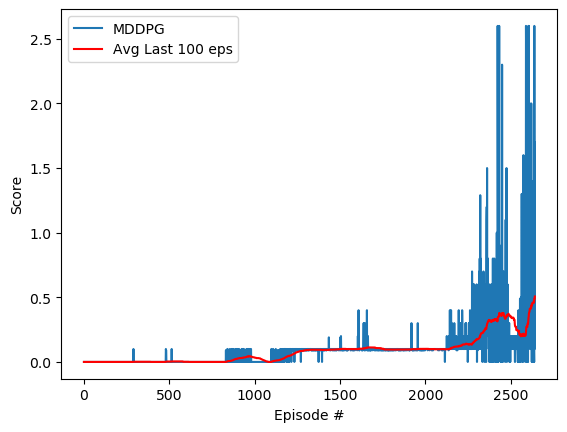

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='MDDPG')
plt.plot(np.arange(len(scores)), avgs, c='r', label='Avg Last 100 eps')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

### Watch a trained agent

In [31]:
# initialize agent
agent = Agent(state_size=state_size,
              action_size=action_size,
              n_agents=num_agents,
              random_seed=0,
              layer_1=64,
              layer_2=64,)

env_info = env.reset(train_mode=False)[brain_name]
# load checkpoint
agent.actor_local.load_state_dict(torch.load('actor_checkpoint.pth'))
agent.critic_local.load_state_dict(torch.load('critic_checkpoint.pth'))

<All keys matched successfully>

In [32]:
for i in range(1, 6):                                      
    env_info = env.reset(train_mode=False)[brain_name]     
    states = env_info.vector_observations                  
    scores = np.zeros(num_agents)                          
    while True:
        actions = agent.act(states) 
        actions = np.clip(actions, -1, 1)                  
        env_info = env.step(actions)[brain_name]           
        next_states = env_info.vector_observations         
        rewards = env_info.rewards                         
        dones = env_info.local_done                        
        scores += env_info.rewards                         
        states = next_states                               
        if np.any(dones):                                  
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.20000000298023224
Score (max over agents) from episode 2: 0.30000000447034836
Score (max over agents) from episode 3: 0.10000000149011612
Score (max over agents) from episode 4: 0.30000000447034836
Score (max over agents) from episode 5: 0.4000000059604645


When finished, you can close the environment.

In [ ]:
env.close()